In [24]:
from pathlib import Path
import pandas as pd
import numpy as np
import os
import re
import gc
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

In [25]:
nbPath = Path(os.getcwd())
dataDirPath = './DataSets'

### Load and Simply Go through the Data

In [26]:

for file_name in os.listdir(dataDirPath):
    # print(file_name)
    if(re.search(r'.*\.(.+)', file_name).group(1) == 'csv'):
        file_path = os.path.join(dataDirPath, file_name)
        df = pd.read_csv(file_path)
        print(file_name)
        print('---------------------------------')
        print(df.info())
        print('=================================')
        print(' ')
        del df 
        gc.collect()

Cab_Data.csv
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
 
City.csv
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object

In [27]:
cab = pd.read_csv(os.path.join(dataDirPath, 'Cab_Data.csv'))
city = pd.read_csv(os.path.join(dataDirPath, 'City.csv'))
customerid = pd.read_csv(os.path.join(dataDirPath, 'Customer_ID.csv'))
transaction = pd.read_csv(os.path.join(dataDirPath, 'Transaction_ID.csv'))

In [28]:
print(cab.head())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  


In [29]:
def transform(x):
    return x.replace(',', '')    
city['Population'] = city['Population'].apply(transform).astype(int)
city['Users'] = city['Users'].apply(transform).astype(int)
city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [30]:
customerid.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [31]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## Exploratory Data Analysis

### Cab_Data.csv

<Figure size 864x1440 with 0 Axes>

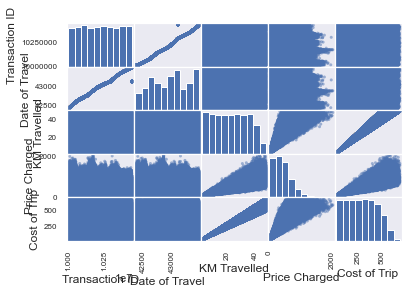

56980

In [32]:
# scatter matrix
nums_cab = cab.select_dtypes(exclude=['object'])

plt.figure(figsize=(12, 20))
pd.plotting.scatter_matrix(nums_cab)
plt.show()

del nums_cab
gc.collect()

C:\Users\shiju\AppData\Local\Temp/ipykernel_19668/2751591097.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticks(), rotation=90)
C:\Users\shiju\AppData\Local\Temp/ipykernel_19668/2751591097.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticks(), rotation=90)
C:\Users\shiju\AppData\Local\Temp/ipykernel_19668/2751591097.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticks(), rotation=90)


<Figure size 864x2160 with 0 Axes>

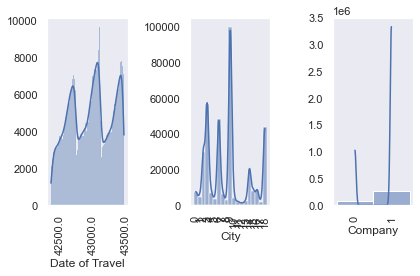

In [33]:
# distribution of Transactions, dates, city, company
cols = np.array(['Date of Travel', 'City', 'Company'])
plt.figure(figsize=(12, 30))
fig, axes = plt.subplots(1, 3)
for i in range(len(axes)):
    # ax.hist(x = cab[cols[np.where(ax == axes)[0].item()]])
    # ax.set_xticklabels(ax.get_xticks(), rotation = 90)
    # ax.set_xlabel(cols[np.where(ax == axes)[0].item()])
    sns.histplot(data=cab, x=cols[i], ax=axes[i], kde=True)
    # ax2 = axes[i].twinx()
    # sns.kdeplot(data=cab, x=cols[i], ax = ax2)
    axes[i].set_xticklabels(axes[i].get_xticks(), rotation=90)
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

### City.csv

<Figure size 864x1440 with 0 Axes>

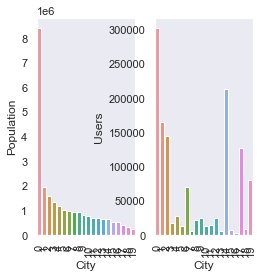

In [34]:
plt.figure(figsize=(12, 20))
fig, axes = plt.subplots(1,2)
plt.subplots_adjust(left=0, right=0.5)
x_ = 'City'
y_s = ['Population', 'Users']
for i in range(len(axes)):
    sns.barplot(data=city, x=x_, y=y_s[i], ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticks(), rotation=90)
plt.show()

### Customer_ID.csv

In [35]:
## Distribution of gender, id and income per month
bins = pd.IntervalIndex.from_tuples([(0, 18), (18, 35), (35, 60), (60, 100)])
customerid_copy = customerid.copy()
customerid_copy['age_cut'] = pd.cut(customerid_copy['Age'], bins)
customerid_copy['Income_cut'] = pd.cut(customerid_copy['Income (USD/Month)'], 5)

customerid_copy.head()

,Customer ID,Gender,Age,Income (USD/Month),age_cut,Income_cut
0,29290,Male,28,10813,"(18, 35]","(8600.0, 15200.0]"
1,27703,Male,27,9237,"(18, 35]","(8600.0, 15200.0]"
2,28712,Male,53,11242,"(35, 60]","(8600.0, 15200.0]"
3,28020,Male,23,23327,"(18, 35]","(21800.0, 28400.0]"
4,27182,Male,33,8536,"(18, 35]","(1967.0, 8600.0]"


<Figure size 864x2160 with 0 Axes>

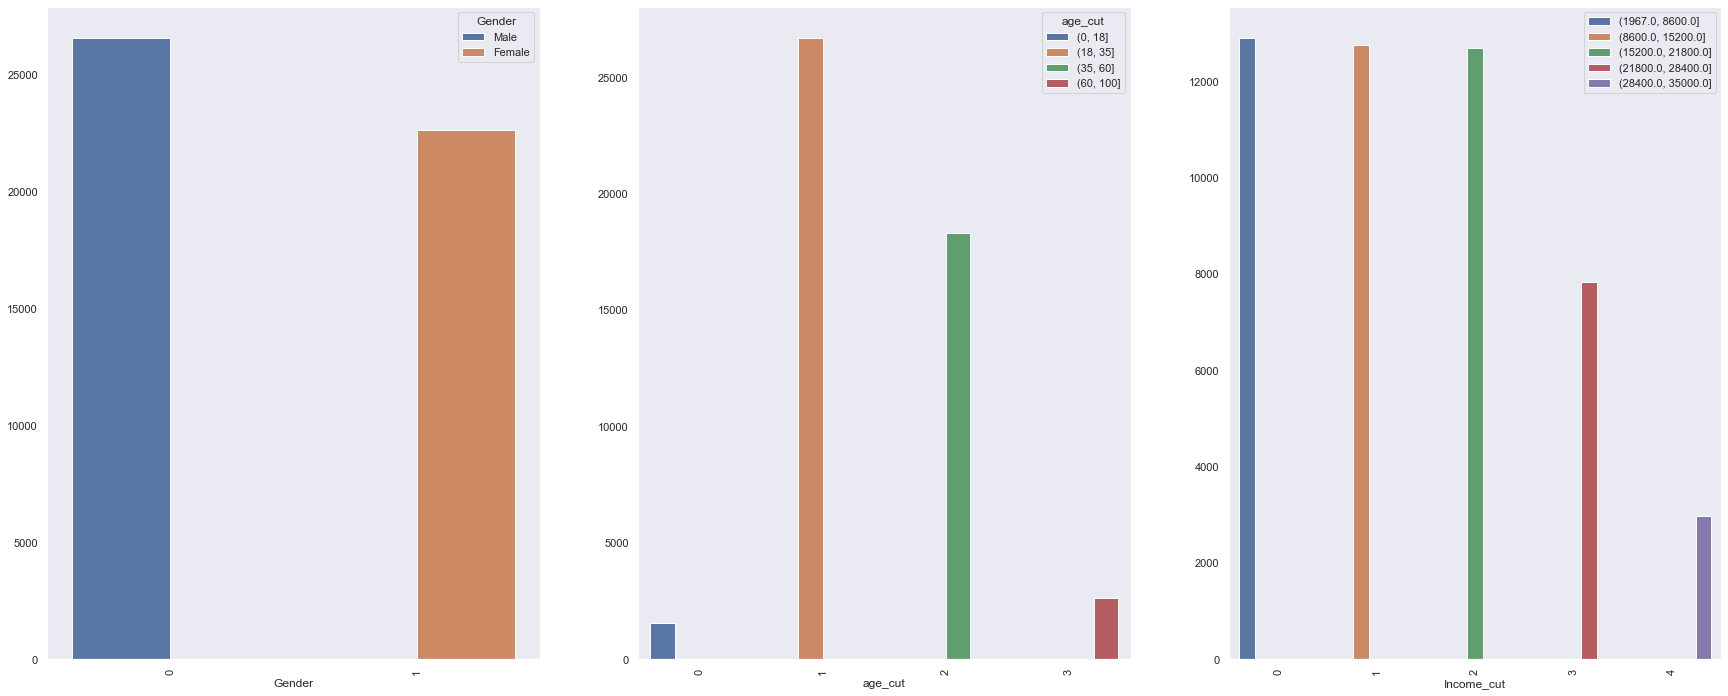

In [36]:
cols = np.array(['Gender', 'age_cut', 'Income_cut'])
plt.figure(figsize=(12, 30))
fig, axes = plt.subplots(1, 3, figsize=(30, 12))
plt.subplots_adjust(hspace=1)
for i in range(len(axes)):
    sns.countplot(data=customerid_copy, x=cols[i], ax=axes[i], hue=cols[i])
    axes[i].set_xticklabels(axes[i].get_xticks(), rotation=90)
    axes[i].set_ylabel('')
# plt.tight_layout()
plt.legend()
plt.show()

### Transaction_ID.csv

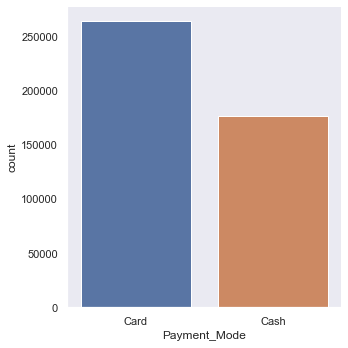

In [37]:
sns.catplot(data=transaction, x='Payment_Mode', kind='count')
plt.show()

## Hypothesis and Investigations

### Prepare data

In [38]:
# Merge dataframes into one dataframe for convenience

df = pd.merge(cab, city, on='City', how='left')
df = pd.merge(df, transaction, on='Transaction ID', how='left')
df = pd.merge(df, customerid_copy, on='Customer ID', how='left')

df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),age_cut,Income_cut
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701,29290,Card,Male,28,10813,"(18, 35]","(8600.0, 15200.0]"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701,27703,Card,Male,27,9237,"(18, 35]","(8600.0, 15200.0]"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701,28712,Cash,Male,53,11242,"(35, 60]","(8600.0, 15200.0]"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701,28020,Cash,Male,23,23327,"(18, 35]","(21800.0, 28400.0]"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,814885,24701,27182,Card,Male,33,8536,"(18, 35]","(1967.0, 8600.0]"


#### Deal with column: Date of Travel

In [39]:
print(df['Date of Travel'].unique()[:10])
print(df['Date of Travel'].min(), df['Date of Travel'].max())
print(df['Date of Travel'].max() - (df['Date of Travel'].min() - 1))
print(365 * 3)

end = datetime.date(2018, 12, 31)
start = datetime.date(2016, 1, 31)
print((end - start).days)

[42377 42375 42371 42376 42372 42381 42380 42379 42378 42374]
42371 43465
1095
1095
1065


Although in the problem description we are informed that the time period of data is from 31/01/2016 to 31/12/2018, I will regard the time period of data as it is from 01/01/2016 to 31/12/2018. The reason is as we can see in the code chunck above, the difference of maximum and minimun of column 'Date of Travel' is 1094 which has 30 days more than the difference between  31/01/2016 and 31/12/2018. 

In [40]:
# parse column: Date of Travel
startDate = datetime.date(2016, 1, 1)
startNumber = df['Date of Travel'].min()
def transformDate(x):
    newDate = startDate + datetime.timedelta(days=(x-startNumber))
    return newDate

df['Date'] = df['Date of Travel'].apply(transformDate)
df.drop(columns=['Date of Travel'], inplace=True)

In [41]:
# After preprocessing the data we can raise our hypothesis 
# and try to prove them

### Hypothesis and  invesitgations

#### 1. Transactions count over cities

Does the popularities of the two cab companies vary over cities

In [42]:
df.pivot_table(values='Age', index=['City'], columns=['Company'], aggfunc='count')

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


<AxesSubplot:xlabel='count', ylabel='City'>

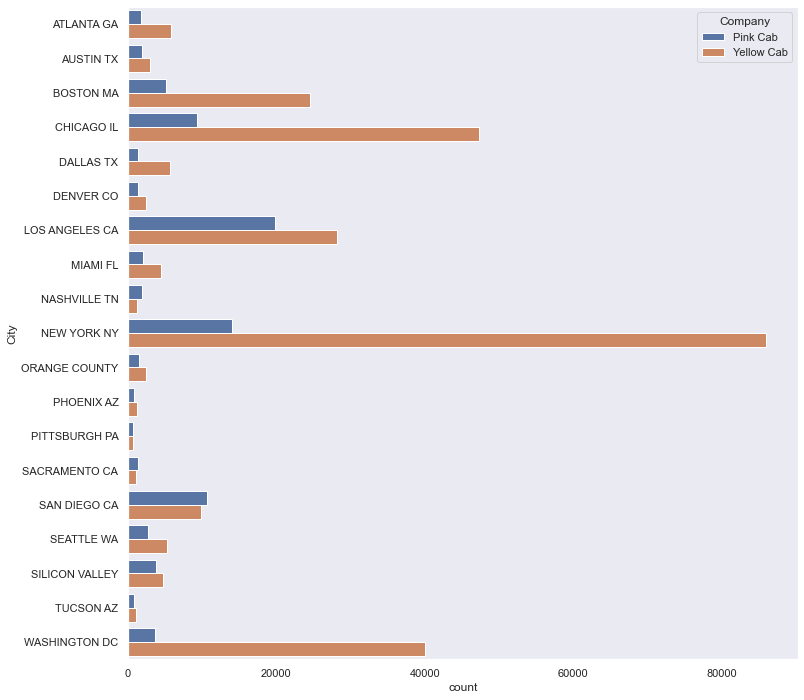

In [43]:
fig, axes = plt.subplots(1, 1, figsize=(12, 12))
sns.countplot(data = df, ax=axes, y='City', hue='Company')

Conclusion: Overall, Yellow Cab is preferred by customers. For Pink Cab, transactions mostly happens at New York, Los Angeles and San Diego while for Yellow Cab trasactions are mainly at Washinton, New York and Chicago.

#### 2. Yearly Profit & Average Profit per transaction

Now that Yellow Cab has a larger volume of transactions, Yellow Cab has a high probability to make more profit.

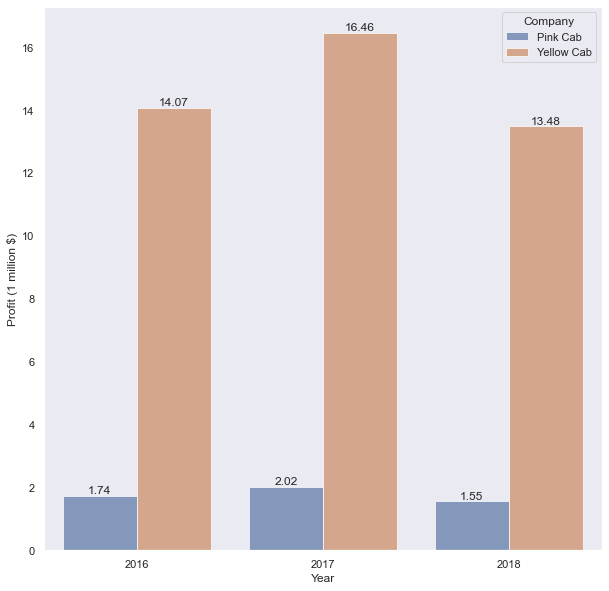

In [44]:
# Yearly Porfit based on time


df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df['Profit'] = df['Profit'] / 1000000
total_profit = df.groupby(by=['Company', 'Year']).agg({'Profit' : 'sum'}).reset_index()

sns.set_theme(style='dark', palette='deep')
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data = total_profit, x='Year', y='Profit', hue='Company', alpha=0.7, ax=ax)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.2f', label_type='edge')
plt.ylabel('Profit (1 million $)')
plt.show()

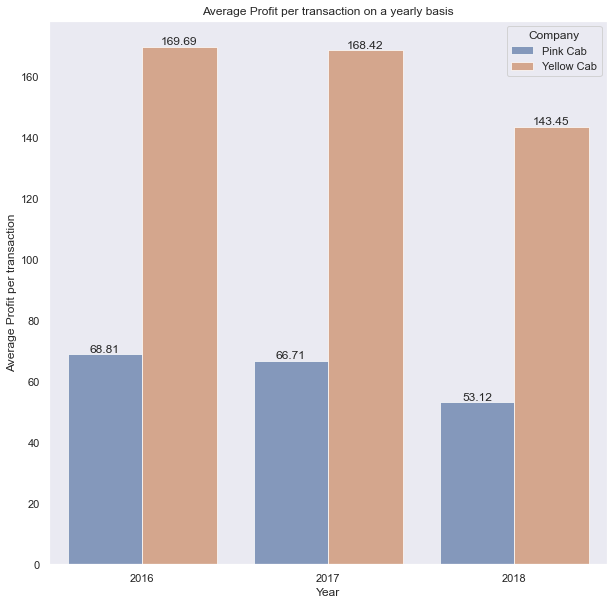

In [45]:
# Average Profit per Transcation

ave_profit = df.groupby(by=['Company', 'Year']).agg({'Profit' : 'mean'}).reset_index().rename({'Profit' : 'Mean_Profit'}, axis=1)
ave_profit['Mean_Profit'] = ave_profit['Mean_Profit'] * 1000000

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data = ave_profit, x='Year', y='Mean_Profit', hue='Company', alpha=0.7, ax=ax)
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.2f', label_type='edge')
plt.ylabel('Average Profit per transaction')
plt.title('Average Profit per transaction on a yearly basis')
plt.show()

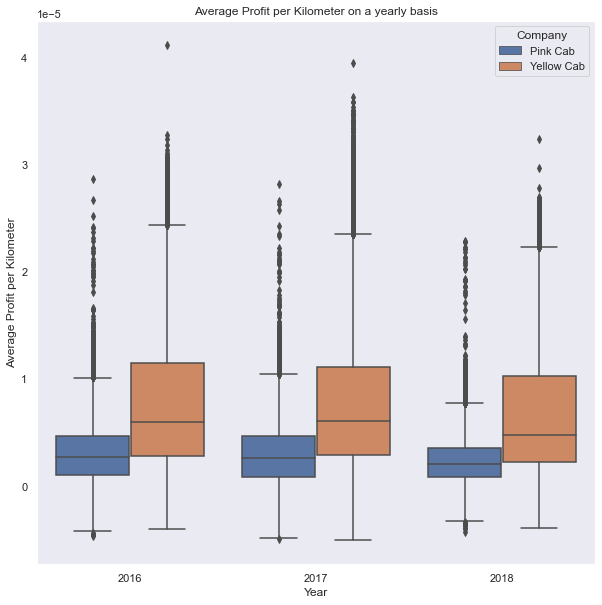

In [57]:
# Average profit per km
df['profit_per_km'] = df['Profit']/ df['KM Travelled']
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x='Year', y='profit_per_km', hue='Company', data=df,)
plt.ylabel('Average Profit per Kilometer')
plt.title('Average Profit per Kilometer on a yearly basis')
plt.show()

As we can see from the grpahs, Yellow Cab does make more profit than Pink Cab

#### Customers preference

Customers with different backgrouds in gender, age and income may have different preference on Cab Company.

Besides, paying with card should be more popular as time goes by

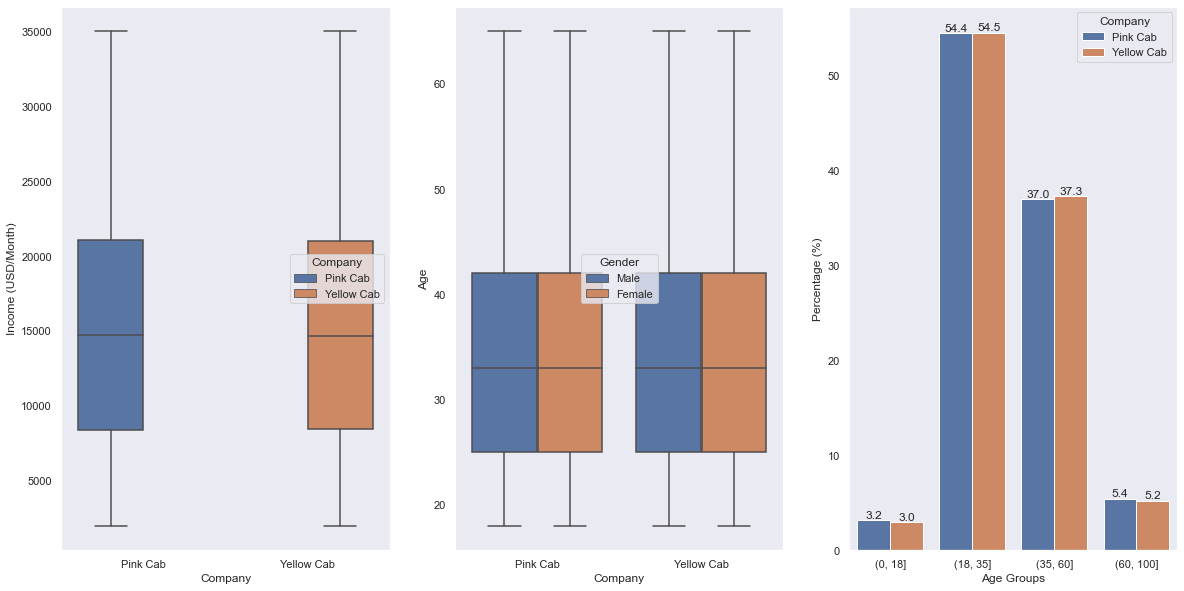

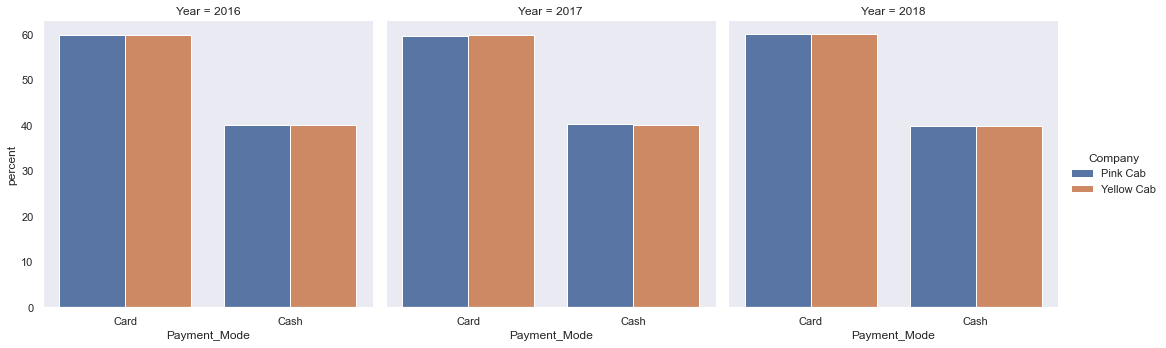

In [88]:
# Base on gender

fig, axes = plt.subplots(1, 3,figsize=(20, 10))

sns.boxplot(x='Company', y='Income (USD/Month)', hue='Company', data=df, ax=axes[0])
sns.boxplot(x='Company', y='Age', hue='Gender', data=df, ax=axes[1])

tmp3 = df.groupby(by=['age_cut', 'Company'])['Transaction ID'].count().reset_index().rename({'Transaction ID' : 'percent'}, axis=1)
tmp3['percent'] = tmp3['percent'] / tmp3.groupby('Company')['percent'].transform('sum') * 100
sns.barplot(x='age_cut', y='percent', hue='Company', data=tmp3, ax=axes[2])
for i in range(len(axes[2].containers)):
    axes[2].bar_label(axes[2].containers[i], fmt='%.1f', label_type='edge')
axes[2].set_xlabel('Age Groups')
axes[2].set_ylabel('Percentage (%)')

tmp3 = df.groupby(by=['Payment_Mode', 'Company', 'Year'])['Transaction ID'].count().reset_index().rename({'Transaction ID' : 'percent'}, axis=1)
tmp3['percent'] = tmp3['percent'] / tmp3.groupby(['Company', 'Year'])['percent'].transform('sum') * 100
sns.catplot(x='Payment_Mode', y='percent', hue='Company', col='Year', data=tmp3, kind='bar')


# del tmp3 
# gc.collect()


plt.show()

The graphs proves that gender, income and age have no influence on poeple's choice on cab company. And choice of peyment method is stable along with time.

#### Cost Analysis

Cab company makes higher profits may have lower costs

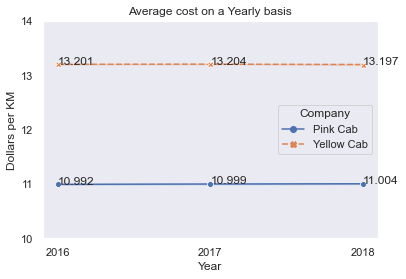

In [122]:
#Average Cost Per KM each Year

df['cost_per_km'] = df['Cost of Trip']/df['KM Travelled']
cost_grouped = df.groupby(['Company', 'Year'])['cost_per_km'].mean().reset_index()
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
g = sns.lineplot(data=df, x='Year', y='cost_per_km', hue='Company', style='Company',markers=True, dashes=True)

for item in cost_grouped.groupby('Year'):
    for x, y, m in item[1][['Year', 'cost_per_km', 'cost_per_km']].values:
        plt.text(x, y, np.round(m, 3))

g.set_xticks(df.Year.unique())
g.set_yticks(np.arange(10, 15, 1))
g.set_ylabel('Dollars per KM')
g.set_title('Average cost on a Yearly basis')
plt.show()

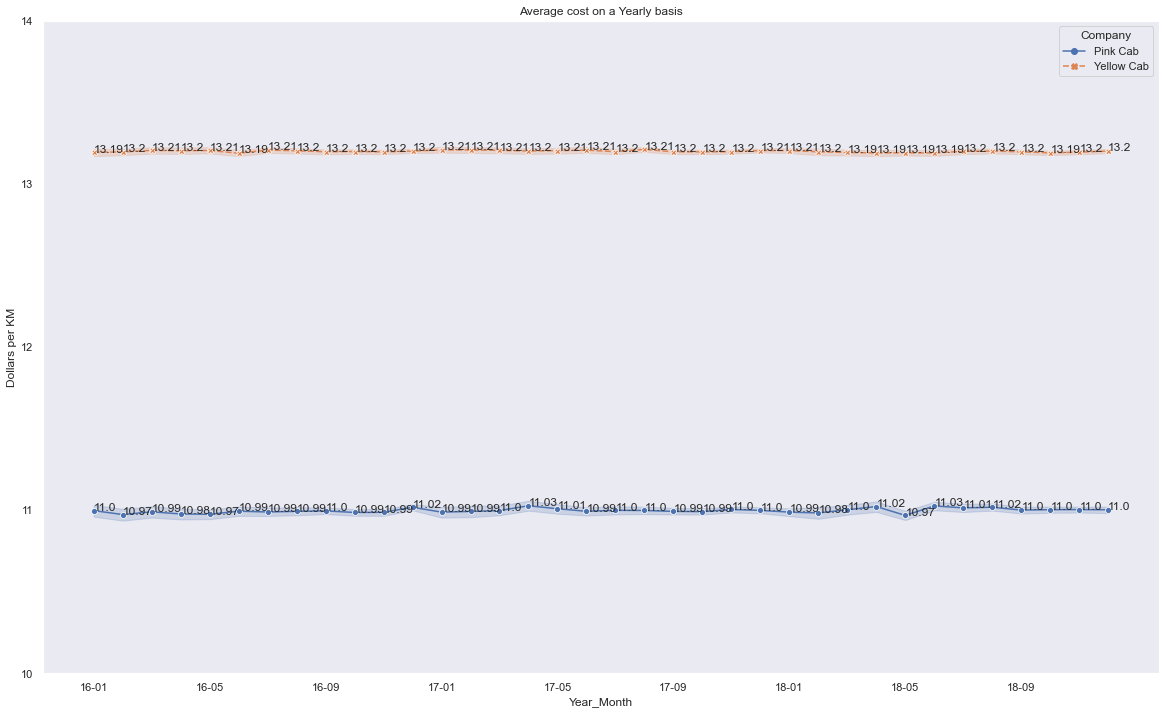

In [148]:
# Monthly Cost
# Seasonal Cost
df['Year_Month'] = df.Date.dt.strftime("%y-%m")
cost_grouped = df.groupby(['Company', 'Year_Month'])['cost_per_km'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
g = sns.lineplot(data=df, x='Year_Month', y='cost_per_km', hue='Company', style='Company',markers=True, dashes=True, ax=ax)

for item in cost_grouped.groupby('Year_Month'):
    for x, y, m in item[1][['Year_Month', 'cost_per_km', 'cost_per_km']].values:
        plt.text(x, y, np.round(m, 2))
        
g.set_xticks([df.Year_Month.unique()[i] for i in range(len(df.Year_Month.unique())) if i %4 ==0])
# g.set_xticklabels(g.get_xticks(), rotation=-30)
g.set_yticks(np.arange(10, 15, 1))
g.set_ylabel('Dollars per KM')
g.set_title('Average cost on a Yearly basis')
plt.show()

Costs for cab do not vary significantly along with time.
Although Yellow Cab makes more profit, it has higher cost.

#### 5. Seasonality

There may be seasonality in incomes of the cab company

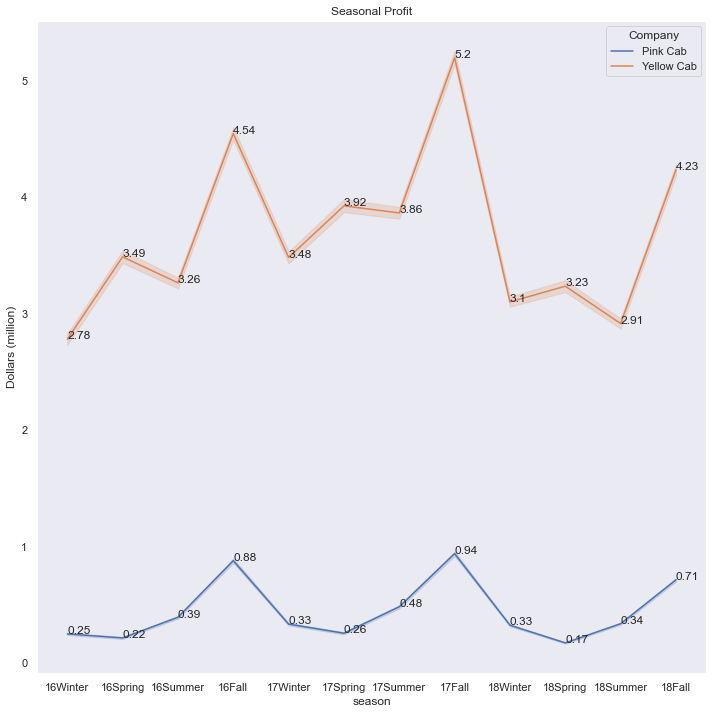

In [161]:
# add season tags to the data
def season(x):

    if(1<=x<=3):
        return 'Winter'
    if(4<=x<=6):
        return 'Spring'
    if(7<=x<=9):
        return 'Summer'
    if(10<=x<=12):
        return 'Fall'

df['season'] = df['Year'].apply(lambda x: str(x)[-2:]) + df.Date.dt.month.apply(lambda x: season(x)).apply(lambda x: str(x))
profit_grouped = df.groupby(['Company', 'season'])['Profit'].sum().reset_index()
fig, ax = plt.subplots(figsize=(12, 12))
g = sns.lineplot(x='season', y='Profit', hue='Company', data=df, estimator='sum', ax=ax)
for item in profit_grouped.groupby('season'):
    for x, y, m in item[1][['season', 'Profit', 'Profit']].values:
        plt.text(x, y, np.round(m, 2))
        
# g.set_xticks(df.Year_Month.unique())
# g.set_xticklabels(g.get_xticks(), rotation=-30)
# g.set_yticks(np.arange(10, 15, 1))
g.set_ylabel('Dollars (million)')
g.set_title('Seasonal Profit')
plt.show()

There is seasonality in the pattern of earnings. In fall companies can make more money

#### 6. Rate of Second Glance

Yellow Cab may have higher rate of second glance

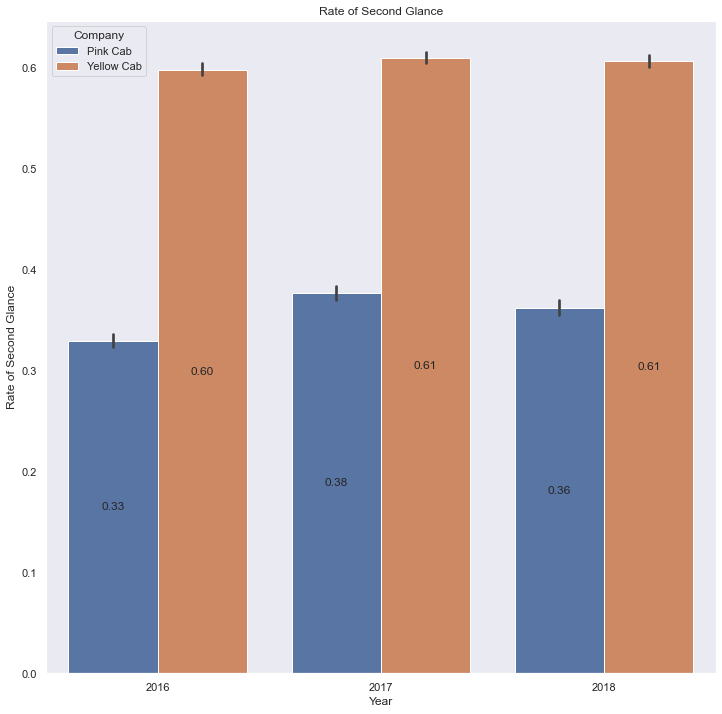

In [184]:
sg = df.groupby(['Customer ID', 'Company', 'Year'])['Age'].count().reset_index().rename({'Age' : 'count'}, axis=1)
sg['is_second_glance'] = sg['count'].apply(lambda x: 1 if x>1 else 0)

fig, ax = plt.subplots(figsize=(12, 12))
g = sns.barplot(x='Year', y='is_second_glance', hue='Company', estimator=np.mean, data=sg)

for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.2f', label_type='center')

g.set_ylabel('Rate of Second Glance')
g.set_title('Rate of Second Glance')
plt.show()

Yellow cab did have a higher rate of second glance

##

## Conclusion

+ As we can see from the graphs and analysis, investing in Yellow cab is a better choice. There are two reasons for makeing this choice: 1. Yellow Cab makes more profit. 2. Yellow Cab takes more market share.